# HW 5 Local Work
## Tomer Solomon Mate

In [2]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.dpi"] = 200
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

import tensorflow as tf



### Task 1

In [3]:
#task 1

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Activation
import keras 

iris_dataset = load_iris()

X_train,X_test,y_train,y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)

num_classes = 3
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


Using TensorFlow backend.


In [6]:
X_train.shape

(112, 4)

In [7]:
#model 
model = Sequential([
    Dense(32, input_shape=(4,)),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(3),
    Activation('softmax'),
])

In [103]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 32)                160       
_________________________________________________________________
activation_37 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 32)                1056      
_________________________________________________________________
activation_38 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 3)                 99        
_________________________________________________________________
activation_39 (Activation)   (None, 3)                 0         
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])


In [13]:
model.fit(X_train, y_train, batch_size=1000, epochs=50, verbose=1)

Epoch 1/50
112/112 [==============================] - 0s - loss: 0.1288 - acc: 0.9732
Epoch 2/50
112/112 [==============================] - 0s - loss: 0.1276 - acc: 0.9732
Epoch 3/50
112/112 [==============================] - 0s - loss: 0.1264 - acc: 0.9732
Epoch 4/50
112/112 [==============================] - 0s - loss: 0.1252 - acc: 0.9732
Epoch 5/50
112/112 [==============================] - 0s - loss: 0.1241 - acc: 0.9732
Epoch 6/50
112/112 [==============================] - 0s - loss: 0.1229 - acc: 0.9732
Epoch 7/50
112/112 [==============================] - 0s - loss: 0.1218 - acc: 0.9732
Epoch 8/50
112/112 [==============================] - 0s - loss: 0.1207 - acc: 0.9732
Epoch 9/50
112/112 [==============================] - 0s - loss: 0.1196 - acc: 0.9732
Epoch 10/50
112/112 [==============================] - 0s - loss: 0.1185 - acc: 0.9732
Epoch 11/50
112/112 [==============================] - 0s - loss: 0.1175 - acc: 0.9732
Epoch 12/50
112/112 [==============================]

In [110]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 0.289
Test Accuracy: 0.974


### Task 2

In [419]:
from keras.datasets import mnist
import keras

(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [406]:
X_train = X_train[0:5]
y_train = y_train[0:5]

In [408]:
y_train.shape

(5,)

In [403]:
X_train = X_train.reshape(5, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

5 train samples
10000 test samples


In [30]:
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                25120     
_________________________________________________________________
activation_5 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [31]:
history_vanilla = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1)


Epoch 1/10
5/5 [==============================] - 0s - loss: 2.1986 - acc: 0.0000e+00
Epoch 2/10
5/5 [==============================] - 0s - loss: 2.0109 - acc: 0.2000
Epoch 3/10
5/5 [==============================] - 0s - loss: 1.8424 - acc: 0.8000
Epoch 4/10
5/5 [==============================] - 0s - loss: 1.6922 - acc: 0.8000
Epoch 5/10
5/5 [==============================] - 0s - loss: 1.5578 - acc: 0.8000
Epoch 6/10
5/5 [==============================] - 0s - loss: 1.4342 - acc: 0.8000
Epoch 7/10
5/5 [==============================] - 0s - loss: 1.3228 - acc: 0.8000
Epoch 8/10
5/5 [==============================] - 0s - loss: 1.2191 - acc: 0.8000
Epoch 9/10
5/5 [==============================] - 0s - loss: 1.1257 - acc: 0.8000
Epoch 10/10
5/5 [==============================] - 0s - loss: 1.0400 - acc: 0.8000


In [32]:
def plot_history(logger):
    df = pd.DataFrame(logger.history)
    df[['acc', 'val_acc']].plot()
    plt.ylabel("accuracy")
    df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
    plt.ylabel("loss")

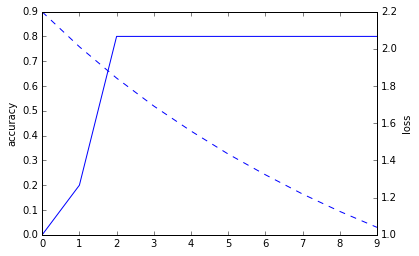

In [37]:
df = pd.DataFrame(history_vanilla.history)
df['acc'].plot()
plt.ylabel("accuracy")
df['loss'].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")''

In [39]:
model_fit = 'test'
test = model_fit + '.png'
print(test)

test.png


In [41]:
str(history_vanilla)

'<keras.callbacks.History object at 0x124c90cf8>'

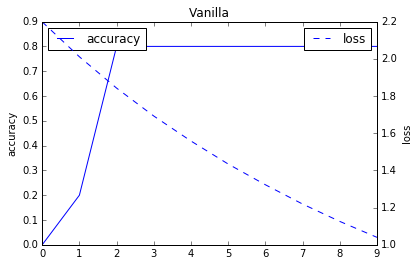

In [69]:
def vizualize(model_fit,title):
    fig, ax = plt.subplots()
    df = pd.DataFrame(model_fit.history)
    acc = df['acc'].plot(label='accuracy')
    plt.ylabel("accuracy")
    
    ax2 = ax.twinx()
    loss = ax2.plot(df['loss'],linestyle='--',label='loss')
    #loss = df['loss'].plot(linestyle='--', ax=plt.twinx(),label='loss')
    plt.ylabel("loss")

    ax2.legend(loc=1)
    ax.legend(loc=2)

    
    plt.title(title)
    plt.savefig(str(title)+'.png')

vizualize(history_vanilla,'Vanilla')


## Task 3

In [496]:
import scipy.io

mat = scipy.io.loadmat('train_32x32.mat')


In [507]:
X_train_raw = mat['X']
y_train_raw = mat['y']


In [508]:
X_train = X_train_raw.transpose((3, 0, 1, 2))[0:200]

In [509]:
y_train = []
for i,x in enumerate(y_train_raw):
    y_train.append(x[0])

y_train = pd.Series(y_train).replace(10,0)
y_train = np.asarray(y_train)[0:200]


In [510]:
# input image dimensions
img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols, 3)

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
X_train = X_train.astype('float32')
X_train /= 255

num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)


In [511]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

cnn = Sequential()
cnn.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(num_classes, activation='softmax'))

cnn.summary()
cnn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_41 (Dense)             (None, 64)                147520    
_________________________________________________________________
dense_42 (Dense)             (None, 10)                650       
Total para

In [512]:
history_cnn = cnn.fit(X_train, y_train,
                      batch_size=128, epochs=20, verbose=1)

Epoch 1/20
1000/1000 [==============================] - 3s - loss: 2.2523 - acc: 0.1870     
Epoch 2/20
1000/1000 [==============================] - 2s - loss: 2.2279 - acc: 0.2070     
Epoch 3/20
1000/1000 [==============================] - 3s - loss: 2.2251 - acc: 0.2070     
Epoch 4/20
1000/1000 [==============================] - 2s - loss: 2.2124 - acc: 0.2070     
Epoch 5/20
1000/1000 [==============================] - 2s - loss: 2.2062 - acc: 0.2070     
Epoch 6/20
1000/1000 [==============================] - 2s - loss: 2.1960 - acc: 0.2070     
Epoch 7/20
1000/1000 [==============================] - 2s - loss: 2.1835 - acc: 0.2240     
Epoch 8/20
1000/1000 [==============================] - 2s - loss: 2.1483 - acc: 0.2620     
Epoch 9/20
1000/1000 [==============================] - 2s - loss: 2.0962 - acc: 0.2520     
Epoch 10/20
1000/1000 [==============================] - 2s - loss: 2.0291 - acc: 0.2950     
Epoch 11/20
1000/1000 [==============================] - 3s - loss: 1

In [513]:
mat_train = scipy.io.loadmat('train_32x32.mat')

num_classes = 10
img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols, 3)

def make_data(mat):
	X_train_raw = mat_train['X']
	y_train_raw = mat_train['y']

	X_train = X_train_raw.transpose((3, 0, 1, 2))[0:200]

	y_train = []
	for i,x in enumerate(y_train_raw):
	    y_train.append(x[0])

	y_train = pd.Series(y_train).replace(10,0)
	y_train = np.asarray(y_train)[0:200]

	X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
	X_train = X_train.astype('float32')
	X_train /= 255


	y_train = keras.utils.to_categorical(y_train, num_classes)

	return X_train,y_train

X_train,y_train = make_data(mat_train)

## TASK 4